# DASL Challenge 3 by Team 13

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from ipywidgets import interactive
import re
import warnings
warnings.filterwarnings('ignore')

To import the data file 

In [2]:
# importing the excel file
df = pd.read_csv('foodhub-order.csv')

# to check the first five rows of the data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Understanding the structure of the data

In [3]:
# to check out random sample of the dataset
df.sample(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
93,1476635,86731,Mission Cantina,Mexican,16.20,Weekend,5,31,18
1662,1478113,74048,ilili Restaurant,Middle Eastern,25.22,Weekday,4,32,25
328,1478075,232359,The Meatball Shop,American,29.25,Weekend,3,21,19
504,1478052,77544,Shake Shack,American,24.30,Weekend,4,35,16
677,1477325,54110,Parm,Italian,19.35,Weekday,4,23,26
856,1478438,114085,Blue Ribbon Sushi Bar & Grill,Japanese,9.12,Weekend,3,27,27
1617,1477628,83287,Blue Ribbon Sushi Izakaya,Japanese,9.22,Weekend,Not given,28,15
424,1477066,376381,Shake Shack,American,8.25,Weekend,Not given,30,15
1201,1476676,186473,Blue Ribbon Sushi,Japanese,16.06,Weekday,Not given,34,33
33,1477748,105349,TAO,Japanese,9.12,Weekend,Not given,34,18


### Let me check for duplicate data

In [4]:
# to check if the data is duplicated
df.duplicated().sum()

0

In [5]:
# to check if the order_id is duplicated
df['order_id'].duplicated().sum()

0

There are no duplicate data present in the data

### **Question 1:** How many rows and columns are present in the data?

In [6]:
# to get the rows and columns of the data, we use the shape function
shape = df.shape

# the number of rows
print(f'There are {shape[0]} rows present in the data')

# the number of columns
print(f'There are {shape[1]} columns present in the data')

There are 1898 rows present in the data
There are 9 columns present in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [7]:
# to check for the datatypes
print(df.info())


# another alternative is to use dtypes
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time 

My `order_id` and `customer_id` column have the int64 datatype and I want them to both be strings. I would proceed to change the datatypes

In [8]:
# to change the data types using dictionary
convert_dict = {'order_id': str,
                'customer_id': str
                }

df = df.astype(convert_dict)

# to check if the changes work
print(df.dtypes)

order_id                  object
customer_id               object
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [9]:
# to check if there are null values in each column
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

There are no null values present in each column of the data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [10]:
# to check the descriptive statistics of the data
df.describe()

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


To answer the follow up questions

In [11]:
# what is the minimum, average and maximum time it takes for food to be prepared once an order is placed
# Apply min, mean, and max functions on the column
min_value = str(df['food_preparation_time'].min())
mean_value = str(round(df['food_preparation_time'].mean(), 2))
max_value = str(df['food_preparation_time'].max())

# Print the results
print(f"The Mininum time it takes for food to be prepared once an order is placed is {min_value} minutes")
print(f"The Average (mean) time it takes for food to be prepared once an order is placed is {mean_value} minutes")
print(f"The Maximum time it takes for food to be prepared once an order is placed is {max_value} minutes")

The Mininum time it takes for food to be prepared once an order is placed is 20 minutes
The Average (mean) time it takes for food to be prepared once an order is placed is 27.37 minutes
The Maximum time it takes for food to be prepared once an order is placed is 35 minutes


### **Question 5:** How many orders are not rated? 

In [12]:
# to count number of orders that are not rated
row_length = len(df[df['rating'] == "Not given"])

print(f"There are {row_length} orders that are not rated")

There are 736 orders that are not rated


Instead of having "Not given" in the column, I would replace them with null values

In [13]:
# Replace "Not given" values with null values
df['rating'] = df['rating'].replace('Not given', None)

# to change the data type of the column
df['rating'] = df['rating'].astype(float).astype('Int64')


# to confirm if the changes were made
print(df['rating'].dtype)
print(df['rating'].unique())

Int64
<IntegerArray>
[<NA>, 5, 3, 4]
Length: 4, dtype: Int64


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID

For this column, I would be using a histogram to show its distribution. Before I show distribution, I would like to know how many unique orders 

In [14]:
# how many unique orders
df['order_id'].nunique()

1898

There are 1898 orders in the dataset

In [82]:
def plot_column_distribution(df, column_name):
    #Create a histogram using Plotly Express
    fig = px.histogram(df, x=column_name, color_discrete_sequence=['lightblue'])

    # Labelling histogram
    fig.update_layout(
        title=f"Distribution of {column_name}  (Hover over for more details)",
        xaxis_title=column_name,
        yaxis_title="Count"
    )

    # to show the histogram
    fig.show()
    

# to use the fucntion to plot the distribution of the order_id
plot_column_distribution(df, 'order_id')

From the chart displayed above, this shows that all my order id have a distribution of one each

#### Customer ID

A hsitogram would be used here as well but first, I would like to know how many unique customers

In [16]:
# how many unique customers
df['customer_id'].nunique()

1200

There are 1200 unique customers in the dataset

In [83]:
# to use the fucntion to plot the distribution of the customer id
plot_column_distribution(df, 'customer_id') # the function has already been created above

#### Restaurant name

To show the distribution of restaurant name, I would be using a countplot.

First let me check the number of restaurants and the available restaurants names

In [18]:
# how many restaurants
df['restaurant_name'].nunique()

178

There are 178 restaurants in the dataset

In [19]:
# what are the restaurants name in the dataset
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

There are some inconsistencies in the restaurant names such as 'Dirty Bird To Go (archived)' with the brackets or 'Big Wong Restaurant \x8c_¤¾Ñ¼' with the right end characters. 

To clean the restaurant names 

In [20]:
# Apply the transformation using a lambda function
df['restaurant_name'] = df['restaurant_name'].apply(lambda name: re.sub(r'\([^)]*\)|[^a-zA-Z\s\,\-\']', '', name).strip())

# Print the updated dataframe
print(df['restaurant_name'].unique())

['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant' 'Empanada Mama' 'Pylos' "Lucky's Famous Burgers"
 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson' 'Blue Ribbon Sushi'
 'Five Guys Burgers and Fries' 'Tortaria' 'Cafe Mogador'
 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza' 'The Kati Roll Company'
 'Klong' 'Napkin Burger' 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill  Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'
 'Blue Ribbon Sushi Bar  Grill' 'Westville Hudson' 'Blue Ribbon Brooklyn'
 'Nobu Next Door' 'Osteria Morini' 'Haandi' 'Benihana' 'Han Dynasty'
 'Chote Nawab' 'Mission Cantina' "Xi'an Famous Foods" 'Rubirosa'
 "Joe's Shanghai" 'Bareburger' 'The Odeon' 'Pongsri Th

Now that the restaurant name has been cleaned, next is to count the number of orders for each restaurant name

In [87]:
# function to create a count plot
def plot_column_count(df, column_name):
    # Creating a count plot using Plotly Express
    count_data = df[column_name].value_counts().reset_index()
    count_data = count_data.sort_values(column_name, ascending= False)

    fig = px.bar(count_data, x='index', y=column_name, color_discrete_sequence=['lightblue'])

    #Customize the count plot
    fig.update_layout(
        title=f"Count Plot showing the distribution of {column_name} (Hover over for more details)",
        xaxis_title=column_name,
        yaxis_title="Count"
    )

    #showing the count plot
    fig.show()
    
# to plot the distribution of the restaurant name  
plot_column_count(df, 'restaurant_name')

#### Insight
From the chart above, **Shake Shack** has the highest occurences in terms of count. This means that this restaurant has the most orders with 219 orders. The second restaurant with the highest occurences is **The Meatball Shop** with 132 orders then **Blue Ribbon Sushi** with 119 orders.

#### Cuisine type

To show the distribution of the cuisine type, I would be using a treemap but before going to show the distribution of cuisine type, I would like to know how many cuisine type are there and what are the cuisine type

In [22]:
# how many cuisine type
df['cuisine_type'].nunique()

14

There are 14 cuisine types in the dataset

In [23]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [89]:
#creating a function to plot a treemap

def plot_treemap(df, column_name, title):
    # Count the appearance of categories in the column
    count_data = df[column_name].value_counts().reset_index()
    count_data.columns = ['Label', 'Value']

    # Create the treemap using Plotly Express
    fig = px.treemap(count_data, path=['Label'], values='Value', color='Value',
                     color_continuous_scale='blues', hover_data=['Value'],
                     labels={'Value': 'Count'})
    # Set the title of the treemap
    fig.update_layout(title=title)  
    
    fig.data[0].textinfo = 'label+text+value'
    #fig.add_traces(textinfo='label+text', hovertemplate='Label: %{label}<br>Count: %{hover_data}')

    # showing the treemap
    fig.show()
    
# using the function to plot my treemap
plot_treemap(df, 'cuisine_type', 'TreeMap showing the distribution of Cuisine Type (Click on any Box to filter)')

#### Insights

From the treemap above, The most ordered cuisine type is the **American** with 584 orders, then **Japanese** with 470 orders then **Italian** with 298 orders

#### Cost of the order

To find the distribution of the `cost of the order`, I would be using a histogram and a KDE. But first let me get the minimum and the maximum cost of order

In [90]:
# to find the minimum and maximum cost of order
print('Minimum cost: $', df['cost_of_the_order'].min())
print('Maximum cost: $', df['cost_of_the_order'].max())

Minimum cost: $ 4.47
Maximum cost: $ 35.41


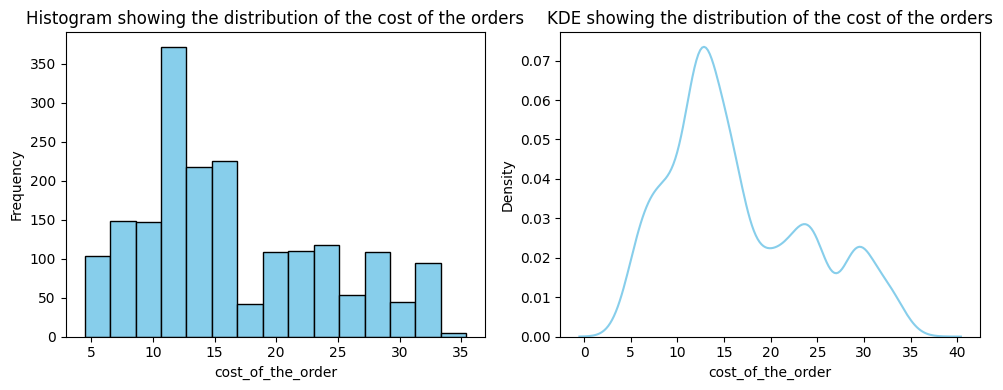

In [26]:
# to plot the histogram and KDE using seaborn
def plot_histogram_with_kde(df, column_name, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Step 3: Plot the histogram
    axes[0].hist(df[column_name], bins=15, color='skyblue', edgecolor='black')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Histogram showing ' + title)

    # Step 4: Plot the KDE plot
    sns.kdeplot(df[column_name], ax=axes[1], color='skyblue')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Density')
    axes[1].set_title('KDE showing ' + title)

    # Step 5: Adjust spacing and display the plot
    plt.tight_layout()
    plt.show()

plot_histogram_with_kde(df, 'cost_of_the_order', 'the distribution of the cost of the orders')

#### Insights
From the charts above, we can see that the most orders are around the cost of 11-13 

#### Day of the week

In [27]:
# to view the top 5 rows of the dataset again
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,<NA>,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,<NA>,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


I want to see how many unique values are in the `day_of_the_week` column of the dataset

In [28]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [91]:
def plot_doughnut_chart(df, column_name, title):
    # Compute the counts for each category
    counts = df[column_name].value_counts()

    # Compute the percentage and create the labels
    total = counts.sum()
    labels = [f"{label} ({count} | {count/total*100:.2f}%)" for label, count in counts.items()]

    # Step 4: Create the doughnut chart trace
    trace = go.Pie(labels=labels, values=counts.values, hole=0.5,
                   marker=dict(colors=['skyblue'] + ['lightgray']*(len(counts)-1)))

    # Step 5: Create the layout
    layout = go.Layout(title='Doughnut Chart ' + title)

    # Step 6: Create the figure and add the trace
    fig = go.Figure(data=[trace], layout=layout)

    # Step 7: Display the chart
    fig.show()
    
    
plot_doughnut_chart(df, 'day_of_the_week', 'showing the distribution of the day of the week (Click on the legend to filter)')

#### Insights
There are more orders during the weekend than weekdays. Orders on weekends take up **71.2% (1,351)** of the Entire orders in the dataset

#### Rating
To show the dsitribution of the `Rating` column I would be using a count plot. But first let me check the minimum, Average and maximum value of the Rating 

In [30]:
# to find the minimum and maximum value of the rating
print("Minimum Rating: ", df['rating'].min())
print("Average Rating: ", round(df['rating'].mean(),1))
print("Maximum Rating: ", df['rating'].max())

Minimum Rating:  3
Average Rating:  4.3
Maximum Rating:  5


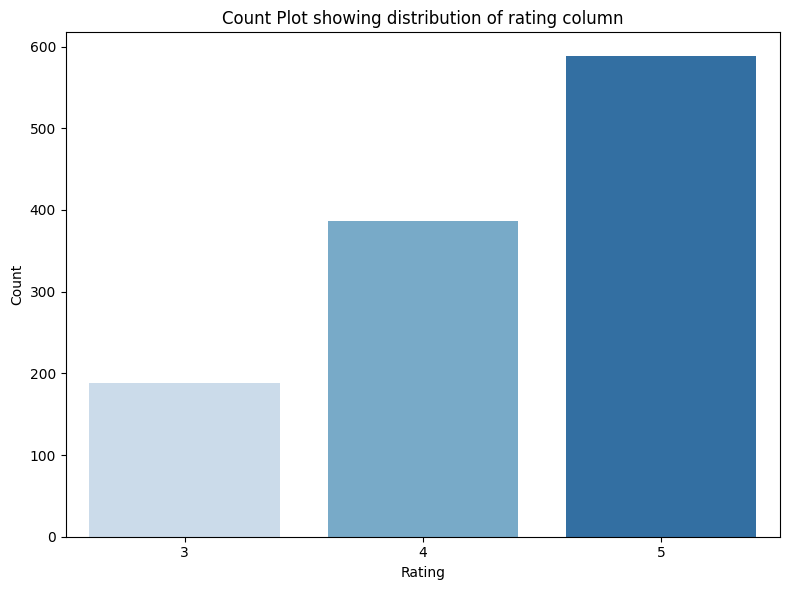

In [31]:
# to plot the distribution of the ratings column

# Drop null values from the column
column_data = df['rating']#.dropna()

# Count the values
count_data = column_data.value_counts().reset_index()
count_data.columns = ['Value', 'Count']

# Sort the values by count in descending order
count_data = count_data.sort_values('Count', ascending= True)

# Create the count plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Value', y='Count', data=count_data, palette='Blues')

# Set the plot title and labels
plt.title('Count Plot showing distribution of rating column')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

#### Insight
From the chart above, There are more 5 point rating then 4 point then 3 point being the lowest. The average rating is 4.3 points. Over 700 of the orders on the table contain null values for rating adn they are not highlighted in this chart.

#### Food Preparation time

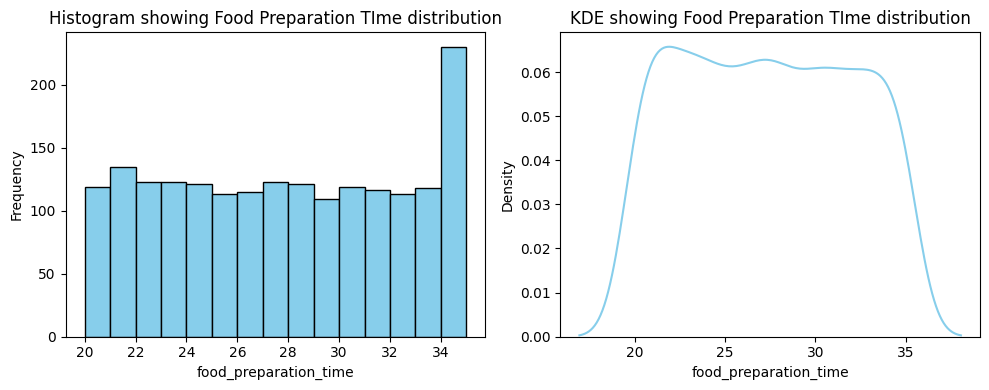

In [93]:
# to find the distribution of the food preparation time
plot_histogram_with_kde(df, 'food_preparation_time', 'Food Preparation TIme distribution')

#### Delivery time

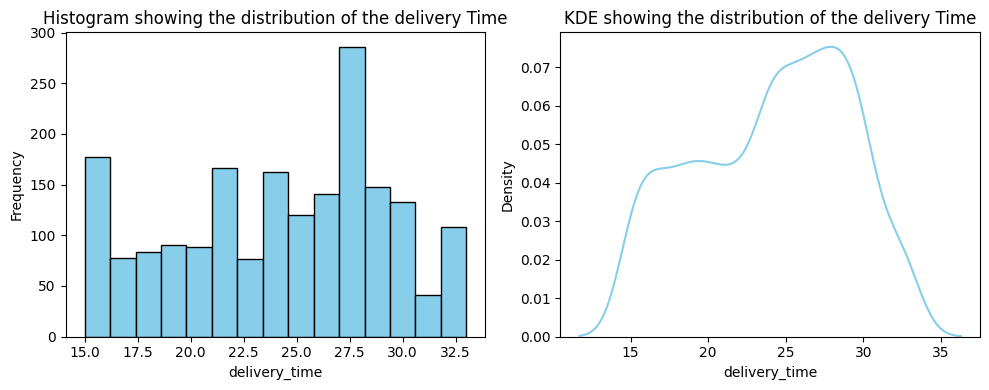

In [33]:
# to find the distribution of the delivery time
plot_histogram_with_kde(df, 'delivery_time', 'the distribution of the delivery Time')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


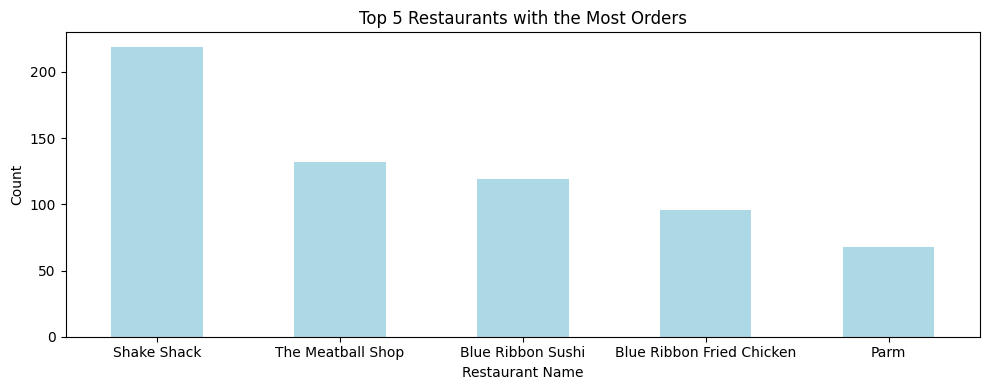

In [95]:
# to find the top 5 restaurants in terms of number of orders received
restaurant_counts = df['restaurant_name'].value_counts().nlargest(5)
print(restaurant_counts)

# Plot the top 5 most used restaurants
plt.figure(figsize=(10, 4))
restaurant_counts.plot(kind='bar', color='lightblue')

# Set the plot title and labels
plt.title('Top 5 Restaurants with the Most Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation= 0)

# Show the plot
plt.tight_layout()
plt.show()

#### Insights
From the chart above, The restaurant with the most orders is Shake Shack then The Meatball Shop then Blue Ribbon Sushi 

### **Question 8**: Which is the most popular cuisine on weekends?

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64


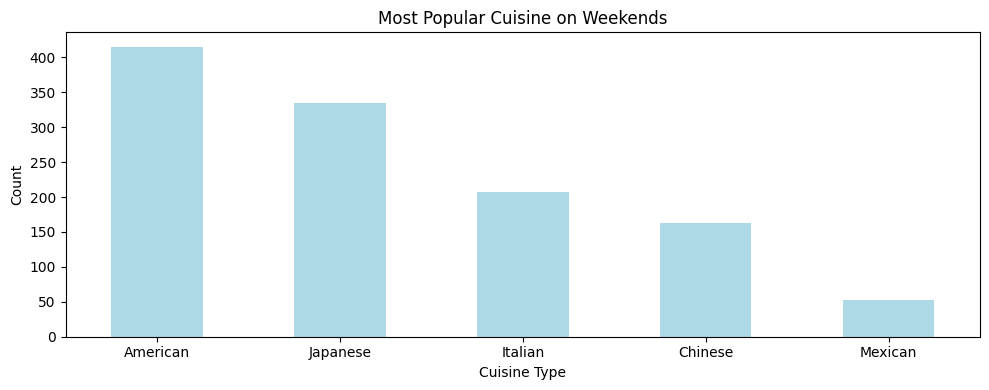

In [94]:
# To first filter the table for only orders on weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# to find the popular cuisine on weekends
cuisines = weekend_orders['cuisine_type'].value_counts().nlargest(5)
print(cuisines)

# Plot the top 5 most used restaurants
plt.figure(figsize=(10, 4))
cuisines.plot(kind='bar', color='lightblue')

# Set the plot title and labels
plt.title('Most Popular Cuisine on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation= 0)

# Show the plot
plt.tight_layout()
plt.show()

#### Insights
Frome the chart above, American Cuisine is the most popular cuisine on Weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [36]:
# first step is to define a function to group the cost
def group_cost(cost):
    if cost > 20:
        return 'Above 20 dollars'
    else:
        return 'Below 20 dollars'

# Next is to apply the function to create the new column
df['Cost Group'] = df['cost_of_the_order'].apply(lambda x: group_cost(x))

# to check if the column is created
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Cost Group
0,1477147,337525,Hangawi,Korean,30.75,Weekend,<NA>,25,20,Above 20 dollars
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,<NA>,25,23,Below 20 dollars
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Below 20 dollars
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,Above 20 dollars
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Below 20 dollars


In [37]:
# to plot a pie chart to check the percentage of orders that cost more than 20 dollars
plot_doughnut_chart(df, 'Cost Group', 'showing the distribution of Cost Group')

#### Insights
From the chart above, the percentage of order above 20 dollars is **29.24% (555 orders)**.

### **Question 10**: What is the mean order delivery time?

To show the mean value of the order delivery time, I would be representing this with a box plot

In [38]:
# to find the mean order delivery time
print("Mean Order Delivery TIme: ", round(df["delivery_time"].mean(), 2), " minutes")

# to plot the box plot using plotly
fig = go.Figure()

# Add the box trace
fig.add_trace(go.Box(y=df['delivery_time'], name = "Distribution", 
                     marker_color='darkblue', boxmean= True, fillcolor='lightblue'))

# Add a line trace for the mean
#mean_value = df['delivery_time'].mean()
#fig.add_trace(go.Scatter(x=[-0.5, 0.5], y=[mean_value, mean_value], mode='lines', name='Mean'))

# Update layout and axis labels
fig.update_layout(title='Box Plot with Mean (Hover around the chart for more details)', yaxis_title='Column')

# Show the plot
fig.show()

Mean Order Delivery TIme:  24.16  minutes


#### Insights
From the chart above, the mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [96]:
# Count the number of orders per customer
customer_orders = df['customer_id'].value_counts().reset_index()
customer_orders.columns = ['CustomerID', 'OrderCount']

# Sort the customer orders in descending order
customer_orders = customer_orders.sort_values('OrderCount', ascending=False)

# Select the top three customers
top_customers = customer_orders.head(3)

# Create the bar chart using Plotly Express
fig = px.bar(top_customers, x='CustomerID', y='OrderCount', color='OrderCount',
             color_continuous_scale='blues', labels={'OrderCount': 'Number of Orders'})

# Set the title
fig.update_layout(title='Top 3 Customers with the Most Orders (Hover over the bars for more details)')

# Show the plot
fig.show()

#### Insights
From the chart above, the three customers who would get the 20% discount are customers with ID **52832** with 13 orders, **47440** with 10 orders & **83287** with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [40]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Cost Group
0,1477147,337525,Hangawi,Korean,30.75,Weekend,<NA>,25,20,Above 20 dollars
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,<NA>,25,23,Below 20 dollars
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Below 20 dollars
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,Above 20 dollars
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Below 20 dollars


#### Cuisine vs Cost of the order

In [41]:
# Calculate the mean of cost_of_the_order column by Cuisine type
mean_df = df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending= True).reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(mean_df, y='cuisine_type', x='cost_of_the_order', color='cost_of_the_order',
             color_continuous_scale='Blues', labels={'Value': 'Mean Value'})

# Set the title
fig.update_layout(title='Mean Cost of Order by Cuisine Type (Hover over the chart for more detail)')

# Show the plot
fig.show()

To further explore the distribution of the cost of the order against each cuisine type

In [42]:
# Create the box plot using Plotly Express
fig = px.box(df, x='cuisine_type', y='cost_of_the_order', color='cuisine_type', 
               color_discrete_sequence=['blue'], labels={'Value': 'Value'})

# Set the title and axis labels
fig.update_layout(title='Cost of Order Distribution by Cuisine type (Click on any cuisine on the legend to filter)', 
                  yaxis_title='Distribution of Cost of Order', 
                 xaxis=dict(title='Cuisine Type', tickangle=90))

# Show the plot
fig.show()

#### Insight
From the first chart above, We can see that **French, Southern, Thai, Spanish & Middle Eastern** are the cuisine type with the highest Average cost of order.

The second chart shows the distribution of the cost of order for each cuisine. I can see the lowest cost of order for each cuisine and the maximum as well as the descriptive statistics for each cuisine type which can be seen by hovering over the box plots.

To do some further exploring between the number of orders for each cuisine and the cost group

In [43]:
# Group the data by Cuisine and Cost Group and count the occurrences
grouped_data = df.groupby(['cuisine_type', 'Cost Group']).size().reset_index(name='Count')

# Calculate the total count for each cuisine
total_counts = grouped_data.groupby('cuisine_type')['Count'].sum().reset_index(name='Total Count')

# Sort the data by the total count in descending order
sorted_data = grouped_data.merge(total_counts, on='cuisine_type').sort_values('Total Count', ascending=False)

# Create the stacked bar chart using Plotly
fig = go.Figure()

# Define custom colors for cost groups
colors = {
    'Below 20 dollars': '#0066cc',   # Dark blue
    'Above 20 dollars': '#66b3ff'    # Light blue
}

# Iterate over each unique cost group
for cost_group in sorted_data['Cost Group'].unique():
    cost_group_data = sorted_data[sorted_data['Cost Group'] == cost_group]
    fig.add_trace(go.Bar(x=cost_group_data['cuisine_type'], y=cost_group_data['Count'], name=cost_group,
                         marker=dict(color=colors[cost_group])))

# Update the layout
fig.update_layout(title='Cuisine Count by Cost Group (Click on the legend to filter)',
                  xaxis=dict(title='Cuisine Type'),
                  yaxis=dict(title='Count'),
                  barmode='stack')

# Show the plot
fig.show()

I wanted to check if the cost of order has anything to do with the total number of cuisine ordered. The total number of cuisine ordered is the same irrespective of the cost of the order.

#### Cuisine vs Food Preparation time

In [97]:
# Calculate the mean of cost_of_the_order column by Cuisine type
mean_df = df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values(ascending= True).reset_index()

# Create the bar chart using Plotly Express
fig = px.scatter(mean_df, y='cuisine_type', x='food_preparation_time', color='food_preparation_time',
             color_continuous_scale='Blues', labels={'Value': 'Mean Value'})

# Set the title
fig.update_layout(title='Mean Food Preparation Time by Cuisine Type (Hover over the chart for more detail)')

# Show the plot
fig.show()

In [45]:
# Create the box plot using Plotly Express
fig = px.box(df, x='cuisine_type', y='food_preparation_time', color='cuisine_type', 
               color_discrete_sequence=['blue'], labels={'Value': 'Value'})

# Set the title and axis labels
fig.update_layout(title='Food Preparation time Distribution by Cuisine Type (Click on any cuisine on the legend to filter)', 
                  yaxis_title='Distribution of Cost of Order', 
                 xaxis=dict(title='Cuisine Type', tickangle=90))

# Show the plot
fig.show()

#### Day of the Week vs Delivery time

First I want to check the average delivery time per Day of the week

In [46]:
# Calculate the mean of Food delivery Time by Day of the Week
mean_df = df.groupby('day_of_the_week')['delivery_time'].mean().sort_values(ascending= True).reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(mean_df, y='day_of_the_week', x='delivery_time', color='delivery_time',
             color_continuous_scale='Blues', labels={'Value': 'Mean Value'})

# Set the title
fig.update_layout(title='Mean Food Delivery Time by Day of the Week (Hover over the chart for more detail)')

# Show the plot
fig.show()

[Text(0, 0.5, 'count of orders'),
 Text(0.5, 1.0, 'Distribution of Delivery Time per Day of the week')]

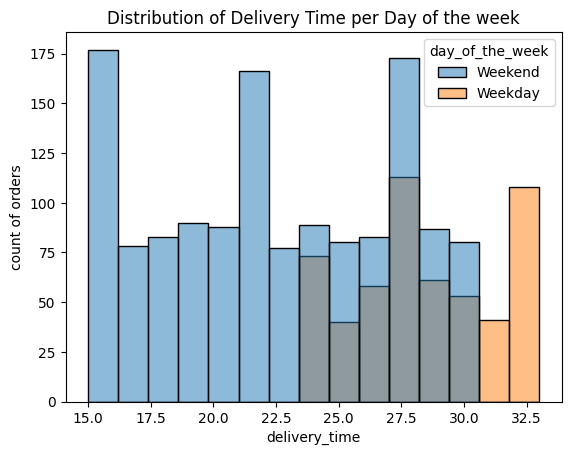

In [47]:
# to plot the distribution of the delivery time per day of the week
ax = sns.histplot(df, x="delivery_time", bins=15, hue="day_of_the_week")
ax.set(ylabel="count of orders", title = "Distribution of Delivery Time per Day of the week")

**Insights**
From the chart above, more delivery time is spent during the weekdays compared to the weekends. From the doughnut chart displayed earlier,there are more orders on weekends compared to weekdays so this delay in delivery cannot be due to large number of orders during the weekdays.

#### Day of the Week vs Food Preparation time

I would start by finding the mean food preparation time for each Day of the Week

In [48]:
# Calculate the mean of food preparation time column by Day of the Week
mean_df = df.groupby('day_of_the_week')['food_preparation_time'].mean().sort_values(ascending= True).reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(mean_df, y='day_of_the_week', x='food_preparation_time', color='food_preparation_time',
             color_continuous_scale='Blues', labels={'Value': 'Mean Value'})

# Set the title
fig.update_layout(title='Mean Food Preparation Time by Day of the Week (Hover over the chart for more detail)')

# Show the plot
fig.show()

Next I want to check the distribution of the food preparation time distriution and color it by the day of the week

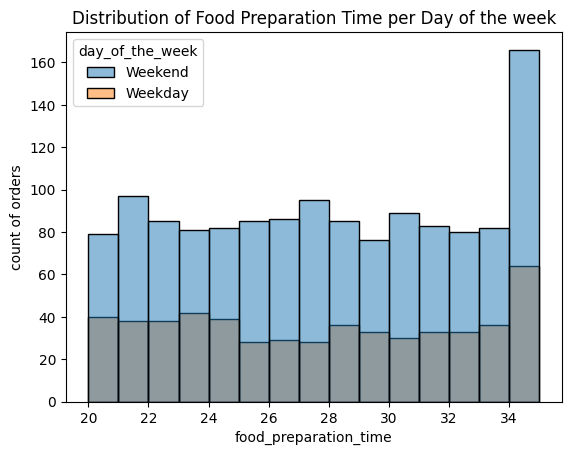

In [49]:
# to plot the distribution of the food preparation time per day of the week
ax = sns.histplot(df, x="food_preparation_time", bins=15, hue="day_of_the_week")
ax.set(ylabel="count of orders", title = "Distribution of Food Preparation Time per Day of the week");

#### Insights
The distribution of the food preparation time for both weekends and weekdays are the same. The chart also shows that the weekends has more orders compared to the weekdays.

#### Rating vs Delivery time

First, I would like the check the mean delivery time for each rating.

In [50]:
# Calculate the mean of delivery time by rating
mean_df = df.groupby('rating')['delivery_time'].mean().sort_values(ascending= True).reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(mean_df, x='rating', y='delivery_time', color='delivery_time',
             color_continuous_scale='Blues', labels={'Value': 'Mean Value'})

# Set the title
fig.update_layout(title='Average Delivery Time per Rating (Hover over the chart for more detail)')

# Show the plot
fig.show()

In [51]:
# Calculate the average value for each category and subcategory
avg_data = df.groupby(['rating', 'day_of_the_week']).size().reset_index(name = 'Count')

# Plot the facet plots using Plotly Express
fig = px.bar(avg_data, x='rating', y='Count', facet_col='day_of_the_week', facet_col_wrap=2,
            color='Count', color_continuous_scale='Blues')

# Update the layout
fig.update_layout(title='Count Of Orders per rating per day of the week',
                  xaxis=dict(title='Rating'),
                  yaxis=dict(title='Number of Orders'))

# Show the plot
fig.show()

In [98]:
# Calculate the average value for each Rating and day of the week
avg_data = df.groupby(['rating', 'day_of_the_week']).mean(['delivery_time']).reset_index()

# Plot the facet plots using Plotly Express
fig = px.bar(avg_data, x='rating', y='delivery_time', facet_col='day_of_the_week', facet_col_wrap=2,
            color='delivery_time', color_continuous_scale='Blues')

# Update the layout
fig.update_layout(title='Average Delivery TIme per rating per day of the week',
                  xaxis=dict(title='Rating'),
                  yaxis=dict(title='Average Delivery Time'))

# Show the plot
fig.show()

From this chart above, It confirms that the delivery time is high on weekdays and it does not in any way affects the rating

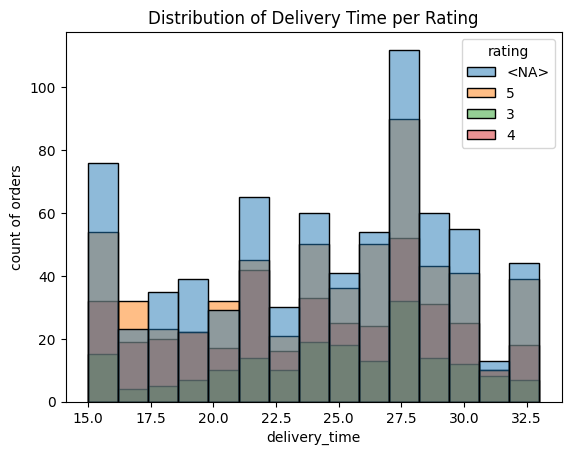

In [53]:
# to find the distribution of the delivery time for each rating excluding the Not given rating
# to make a copy of the dataframe and convert the rating column to string for this analysis
df_rating = df.copy()
df_rating['rating'] = df['rating'].astype(str)

# to plot the chart
ax = sns.histplot(df_rating, x="delivery_time", bins=15, hue="rating")
ax.set(ylabel="count of orders", title = "Distribution of Delivery Time per Rating");

From the charts in this analysis, it shows that the ratings are not as a result of the delivery time

#### Rating vs Cost of the order

Let me find the average cost of the order per rating

In [54]:
# Calculate the mean cost of the order by rating
mean_df = df.groupby('rating')['cost_of_the_order'].mean().sort_values(ascending= True).reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(mean_df, x='rating', y='cost_of_the_order', color='cost_of_the_order',
             color_continuous_scale='Blues', labels={'Value': 'Mean Value'})

# Set the title
fig.update_layout(title='Average Cost of the Order per Rating (Hover over the chart for more detail)')

# Show the plot
fig.show()

In [55]:
# Group the data by rating and Cost Group and count the occurrences
grouped_data = df.groupby(['rating', 'Cost Group']).size().reset_index(name='Count')

# Calculate the total count for each rating
total_counts = grouped_data.groupby('rating')['Count'].sum().reset_index(name='Total Count')

# Sort the data by the total count in descending order
sorted_data = grouped_data.merge(total_counts, on='rating').sort_values('Total Count', ascending=False)

# Create the stacked bar chart using Plotly
fig = go.Figure()

# Define custom colors for cost groups
colors = {
    'Below 20 dollars': '#0066cc',   # Dark blue
    'Above 20 dollars': '#66b3ff'    # Light blue
}

# Iterate over each unique cost group
for cost_group in sorted_data['Cost Group'].unique():
    cost_group_data = sorted_data[sorted_data['Cost Group'] == cost_group]
    fig.add_trace(go.Bar(x=cost_group_data['rating'], y=cost_group_data['Count'], name=cost_group,
                         marker=dict(color=colors[cost_group])))

# Update the layout
fig.update_layout(title='Count of each rating by Cost Group',
                  xaxis=dict(title='Rating'),
                  yaxis=dict(title='Count'),
                  barmode='stack')

# Show the plot
fig.show()

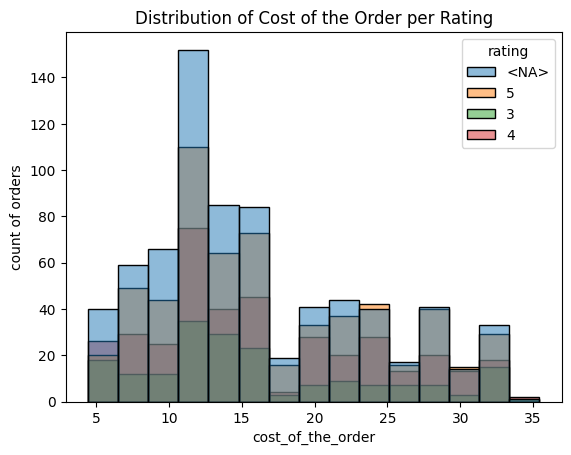

In [56]:
# to find the distribution of the delivery time for each rating, by using df_rating dataframe

ax = sns.histplot(df_rating, x="cost_of_the_order", bins=15, hue="rating")
ax.set(ylabel="count of orders", title = "Distribution of Cost of the Order per Rating");

#### Insights
From the chart above, I do not see any relationship between the rating and the cost of order but before I do that, let me check the correlation between the two variables.

In [57]:
# to find the correlation, I would first exclude the null values
df_filtered = df.dropna(subset=['rating'])

# converting the filtered column to float
df_filtered['rating'] = df_filtered['rating'].astype('float')

# to determine the correlation coefficient
df_filtered['rating'].corr(df_filtered['cost_of_the_order'])

0.033983272179314475

From the correlation, there is no correlation between the two variables

#### Correlation among variables

In [58]:
# to observe a part of the dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Cost Group
0,1477147,337525,Hangawi,Korean,30.75,Weekend,<NA>,25,20,Above 20 dollars
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,<NA>,25,23,Below 20 dollars
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Below 20 dollars
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,Above 20 dollars
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Below 20 dollars


I would start by checking the correlation between numerical variables

In [59]:
correlation = df. corr ()  
correlation. style. background_gradient (cmap = 'Blues')

,cost_of_the_order,rating,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.033983,0.041527,-0.029949
rating,0.033983,1.000000,-0.006083,-0.009804
food_preparation_time,0.041527,-0.006083,1.000000,0.011094
delivery_time,-0.029949,-0.009804,0.011094,1.000000


I would also love to visualize the correlation to observe for any pattern

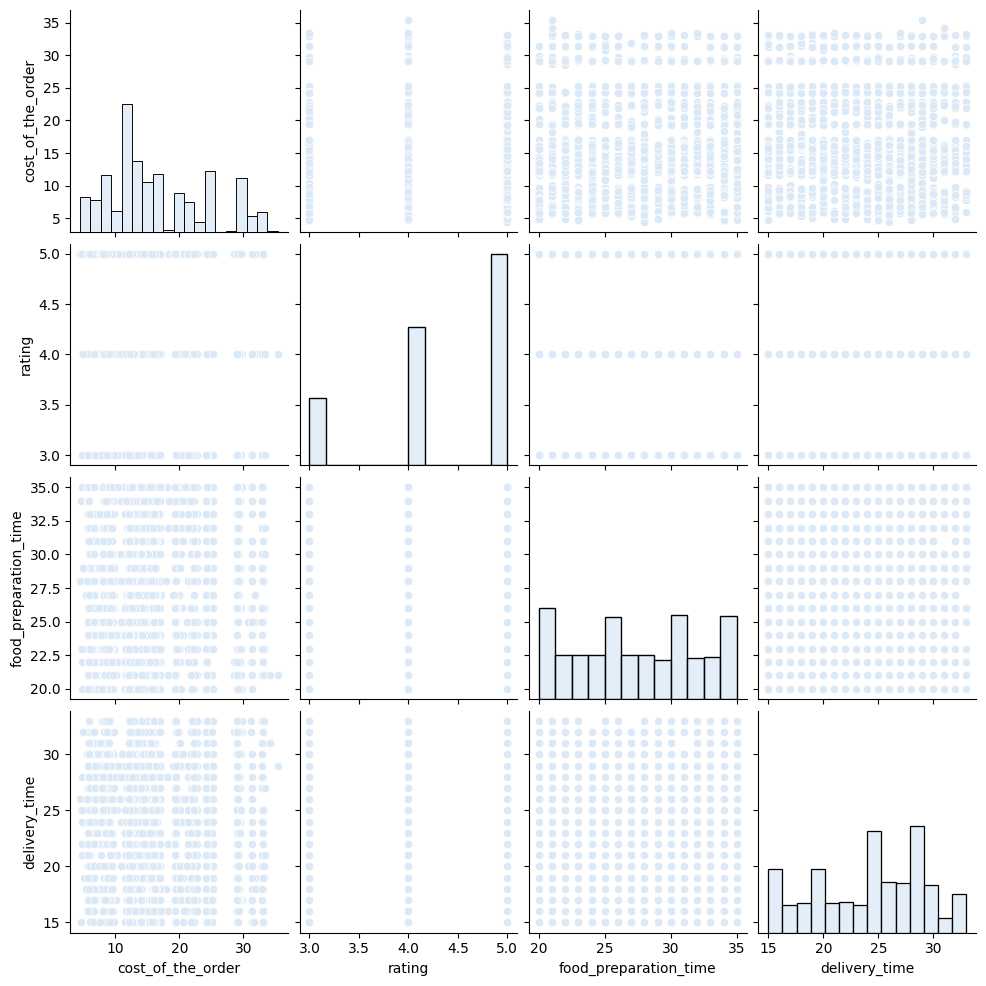

In [60]:
# Set the color palette to blue
sns.set_palette('Blues')

# Plot the pair plot
sns.pairplot(df)

# Show the plot
plt.show()

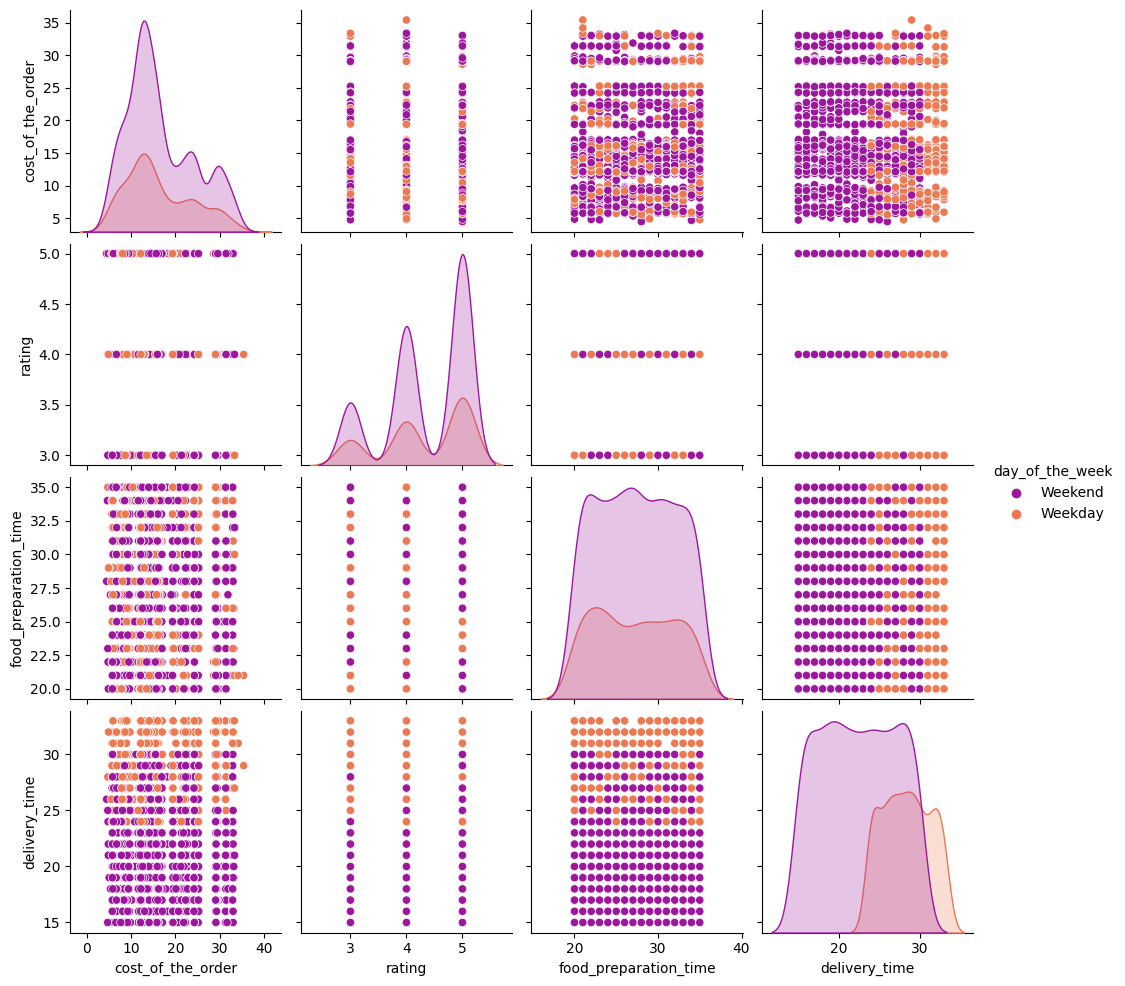

In [61]:
# Plot the pair plot color-coded by the day of the week variable
df['rating'] = df['rating'].astype('float')

sns.pairplot(df, hue='day_of_the_week', palette = 'plasma')

# Show the plot
plt.show()

In [62]:
# plotting a pairplot for the food delivery time and food preparation time colorcoded by the cost group
def size_widgets(height = 2.5, aspect = 1):
    sns.pairplot(df, hue = 'Cost Group', vars = ['food_preparation_time', 'delivery_time', 'rating'], palette = 'plasma',
                height = height, aspect = aspect)
    
interactive(size_widgets, height = (1, 3.5, 0.5), aspect = (0.5, 2, 0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

To perform this analysis, I would first get the restaurants and the count of ratings and their average ratings

In [63]:
# Create a pivot table to count the number of restaurants with ratings and calculate the average rating
restaurants = df.pivot_table(index='restaurant_name', values='rating', aggfunc=['count', 'mean'])

# Rename the columns
restaurants.columns = ['Count', 'Average Rating']

# Sort the pivot table by count in descending order
restaurants = restaurants.sort_values('Count', ascending=False)

# Display the pivot table
print(restaurants)

                           Count  Average Rating
restaurant_name                                 
Shake Shack                  133        4.278195
The Meatball Shop             84        4.511905
Blue Ribbon Sushi             73        4.219178
Blue Ribbon Fried Chicken     64        4.328125
RedFarm Broadway              41        4.243902
...                          ...             ...
Market Table                   0             NaN
Paul  Jimmy's                  0             NaN
Room Service                   0             NaN
Rohm Thai                      0             NaN
Lamarca Pasta                  0             NaN

[177 rows x 2 columns]


To filter the pivot table for restaurants with more than 50 ratings and an average of above 4

In [64]:
# Filter the pivot table for restaurants with more than 50 counts and average rating above 4
filtered_restaurants = restaurants.query("Count > 50 and `Average Rating` > 4")

# Sort the filtered pivot table by count in descending order
filtered_restaurants = filtered_restaurants.sort_values('Count', ascending=False)

print(filtered_restaurants)

                           Count  Average Rating
restaurant_name                                 
Shake Shack                  133        4.278195
The Meatball Shop             84        4.511905
Blue Ribbon Sushi             73        4.219178
Blue Ribbon Fried Chicken     64        4.328125


To display the results in a chart

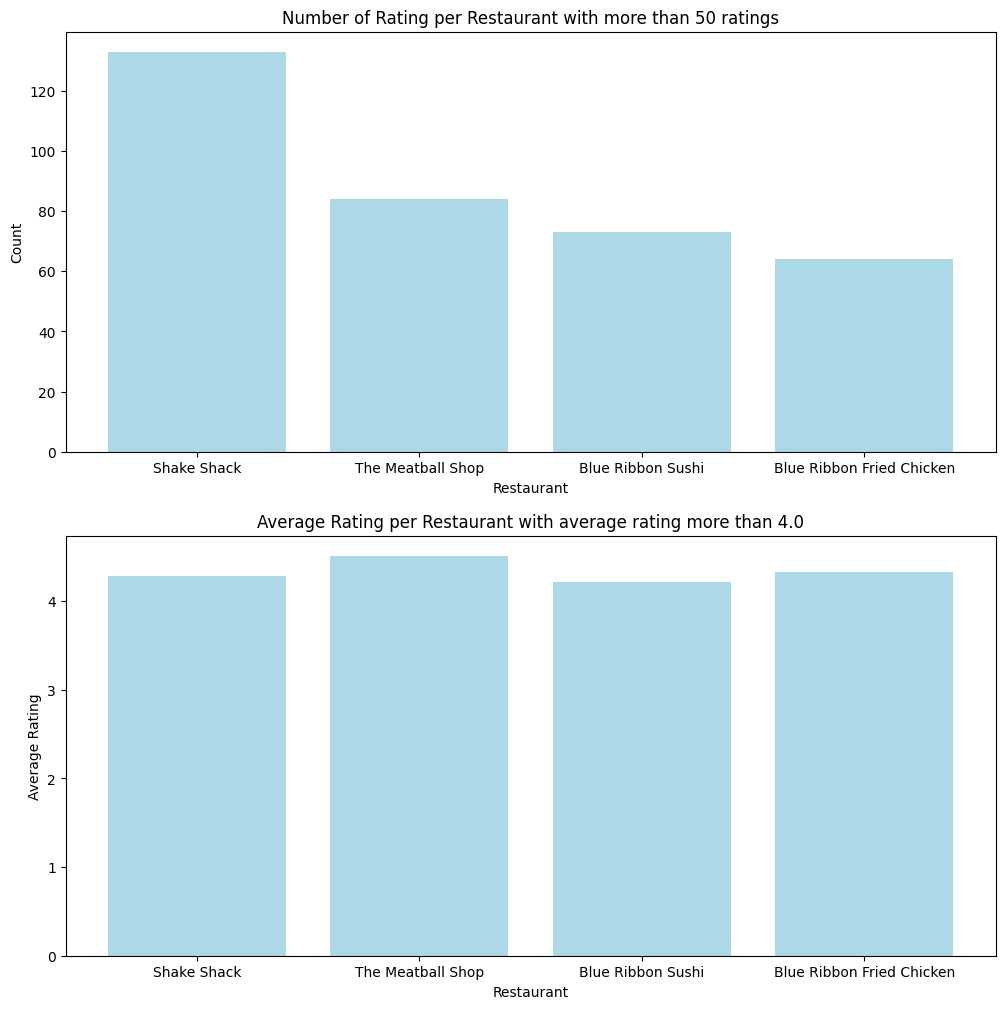

In [65]:
# Plot the subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Subplot 1: Restaurant count
axes[0].bar(filtered_restaurants.index, filtered_restaurants['Count'], color='lightblue')
axes[0].set_xlabel('Restaurant')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Rating per Restaurant with more than 50 ratings')

# Subplot 2: Average rating
axes[1].bar(filtered_restaurants.index, filtered_restaurants['Average Rating'], color='lightblue')
axes[1].set_xlabel('Restaurant')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Average Rating per Restaurant with average rating more than 4.0')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=0)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()

**Insights**

From the analysis above, the restaurants that meet the criteria (more than 50 ratings and average rating more than 4) for the promotional offer in advertisement are
- Shake Shack (133 rating | 4.28 avg. rating)
- The Meatball Shop (84 rating | 4.51 avg. rating)
- Blue Ribbon Sushi (73 rating | 4.22 avg. rating)
- Blue Ribbon Fried Chicken (64 rating | 4.33 avg. rating)

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

To answer this, I would create a new column called `company_charge` then multiply any cost above 20 by 25% and any cost above 5 by 15% and return null for costs below 5 dollars

In [66]:
# Define the lambda function to calculate the company charge based on price
def calculate_company_charge(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return None

# Create the company_charge column using the lambda function
df['company_charge'] = df['cost_of_the_order'].apply(lambda x: calculate_company_charge(x))

# to check if the changes were made
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Cost Group,company_charge
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,Above 20 dollars,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,Below 20 dollars,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,Below 20 dollars,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,Above 20 dollars,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,Below 20 dollars,1.7385


Next step is to find the total revenue

In [67]:
# to Find the net revenue generated by the company across all orders
net_revenue = df['company_charge'].sum()

# print
print(f'The Net Revenue Generated by the company is {net_revenue} dollars')

The Net Revenue Generated by the company is 6166.303 dollars


#### Insights

The net revenue generated by the company after applying the criteria (25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars) is calculated to be $ 6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

I would go about this by first calculating the total time taken which is the sum of the preparation time and delivery time

In [68]:
# Calculate the sum of food preparation time and delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# to check if this worked
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'Cost Group',
       'company_charge', 'total_time'],
      dtype='object')

 Next I would create a new column that would tell me the status for the total delivery using the following condition
 - Total time below 60 minutes be termed as "Early"
 - Total time equal to 60 minutes be termed as "On time"
 - Total time above 60 minutes be termed as "Late"

In [69]:
# Create a new column based on the sum of times
df['status'] = np.where(df['total_time'] > 60, 'Late',
                        np.where(df['total_time'] == 60, 'On time', 'Early'))

# Print the updated dataframe
print(df.head())

  order_id customer_id            restaurant_name cuisine_type  \
0  1477147      337525                    Hangawi       Korean   
1  1477685      358141  Blue Ribbon Sushi Izakaya     Japanese   
2  1477070       66393                Cafe Habana      Mexican   
3  1477334      106968  Blue Ribbon Fried Chicken     American   
4  1478249       76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend     NaN                     25   
1              12.08         Weekend     NaN                     25   
2              12.23         Weekday     5.0                     23   
3              29.20         Weekend     3.0                     25   
4              11.59         Weekday     4.0                     25   

   delivery_time        Cost Group  company_charge  total_time status  
0             20  Above 20 dollars          7.6875          45  Early  
1             23  Below 20 dolla

To find the percentage of orders take more than 60 minutes to get delivered from the time the order is placed, I would be using a doughnut to represent the information

In [99]:
# Calculate the count and proportion of each category in the "status" column
status_counts = df['status'].value_counts()
status_proportions = df['status'].value_counts(normalize=True)

# Create a dataframe with the counts and proportions
status_data = pd.DataFrame({'Status': status_counts.index, 'Count': status_counts.values, 
                            'Proportion': status_proportions.values})

# Format the proportion as a 2 decimal percentage
status_data['Proportion'] = status_data['Proportion'].apply(lambda x: f"{x:.2%}")

# Create the doughnut chart using Plotly Express
fig = px.pie(status_data, values='Count', names='Status', hole=0.6,
             labels={'Count': 'Count', 'Status': 'Status', 'Proportion': 'Proportion'},
             hover_data=['Proportion'],
             color_discrete_sequence=px.colors.qualitative.Set3)

# Add the count and proportion as text labels inside the doughnut chart
fig.update_traces(textinfo='label+text+value+percent')

# Set the title of the doughnut chart
fig.update_layout(title='Distribution of Order Status (Click on the legend to filter)')

# Show the doughnut chart
fig.show()

#### Insights

From the chart above, there are 200 orders delivered to customers abobe 60 minutes from when the order was placed and this accounts for **10.5%** of the orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

To find the mean delivery time for both weekends and weekdays, I would be displaying it on a bar chart

In [71]:
# Calculate the mean of cost_of_the_order column by day of the week
mean_df = df.groupby('day_of_the_week')['delivery_time'].mean().sort_values(ascending= True).reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(mean_df, y='day_of_the_week', x='delivery_time', color='delivery_time',
             color_continuous_scale='Blues', labels={'Value': 'Mean Value'})

# Set the title
fig.update_layout(title='Mean Food Delivery Time by day of the week (Hover over the chart for more detail)')

# Show the plot
fig.show()

From the chart above, the mean delivery time for weekday is higher than the average for weekend but the mean value (measures of central tendency) doesnt tell the full story.

Let me check the distribution of the delivery time for each day of the week

In [72]:
# Create the box plot using Plotly Express
fig = px.box(df, x='day_of_the_week', y='delivery_time', color='day_of_the_week', 
               color_discrete_sequence=['blue'], labels={'Value': 'Value'})

# Set the title and axis labels
fig.update_layout(title='Food Delivery time Distribution by Day of the Week (Click on any cuisine on the legend to filter)', 
                  yaxis_title='Distribution of Food Delivery Time', 
                 xaxis=dict(title='Day of the Week', tickangle=0))

# Show the plot
fig.show()

From the distribution, we can clearly see that all the orders on the weekday had delivery time above 20 mins. The delivery time on the weekday needs to be optimized.

Using the status column created earlier, I want to know the percentage of late orders for weekend and weekdays 

In [73]:
# Calculate the count and proportion of each category in the "status" column for weekdays
weekday_df = df[df['day_of_the_week'] == "Weekday"]
status_counts = weekday_df['status'].value_counts()
status_proportions = df['status'].value_counts(normalize=True)

# Create a dataframe with the counts and proportions
status_data = pd.DataFrame({'Status': status_counts.index, 'Count': status_counts.values, 
                            'Proportion': status_proportions.values})

# Format the proportion as a 2 decimal percentage
status_data['Proportion'] = status_data['Proportion'].apply(lambda x: f"{x:.2%}")

# Create the doughnut chart using Plotly Express
fig = px.pie(status_data, values='Count', names='Status', hole=0.6,
             labels={'Count': 'Count', 'Status': 'Status', 'Proportion': 'Proportion'},
             hover_data=['Proportion'],
             color_discrete_sequence=px.colors.qualitative.Set3)

# Add the count and proportion as text labels inside the doughnut chart
fig.update_traces(textinfo='label+text+value+percent')

# Set the title of the doughnut chart
fig.update_layout(title='Distribution of Order Status on weekday')

# Show the doughnut chart
fig.show()

In [100]:
# Calculate the count and proportion of each category in the "status" column for weekdays
weekend_df = df[df['day_of_the_week'] == "Weekend"]
status_counts = weekend_df['status'].value_counts()
status_proportions = df['status'].value_counts(normalize=True)

# Create a dataframe with the counts and proportions
status_data = pd.DataFrame({'Status': status_counts.index, 'Count': status_counts.values, 
                            'Proportion': status_proportions.values})

# Format the proportion as a 2 decimal percentage
status_data['Proportion'] = status_data['Proportion'].apply(lambda x: f"{x:.2%}")

# Create the doughnut chart using Plotly Express
fig = px.pie(status_data, values='Count', names='Status', hole=0.6,
             labels={'Count': 'Count', 'Status': 'Status', 'Proportion': 'Proportion'},
             hover_data=['Proportion'],
             color_discrete_sequence=px.colors.qualitative.Set3)

# Add the count and proportion as text labels inside the doughnut chart
fig.update_traces(textinfo='label+text+value+percent')

# Set the title of the doughnut chart
fig.update_layout(title='Distribution of Order Status on weekend')

# Show the doughnut chart
fig.show()

From the two doughnut charts above, we can see that over 20% of the orders on weekdays are late

### Conclusion and Recommendations

Before I give recommendation and conclusions, I would like to do some more Explorative Data Analysis.


#### What cuisine are ordered mostly during the weekday?

In [75]:
# Group the data by cuisine type and day of the week and count the occurrences
grouped_data = df.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='Count')

# Calculate the total count for each rating
total_counts = grouped_data.groupby('cuisine_type')['Count'].sum().reset_index(name='Total Count')

# Sort the data by the total count in descending order
sorted_data = grouped_data.merge(total_counts, on='cuisine_type').sort_values('Total Count', ascending=False)

# Create the stacked bar chart using Plotly
fig = go.Figure()

# Define custom colors for cost groups
colors = {
    'Weekend': '#0066cc',   # Dark blue
    'Weekday': '#66b3ff'    # Light blue
}

# Iterate over each unique cost group
for cost_group in sorted_data['day_of_the_week'].unique():
    cost_group_data = sorted_data[sorted_data['day_of_the_week'] == cost_group]
    fig.add_trace(go.Bar(x=cost_group_data['cuisine_type'], y=cost_group_data['Count'], name=cost_group,
                         marker=dict(color=colors[cost_group])))

# Update the layout
fig.update_layout(title='Count of orders for each cuisine type (Click on the legend to filter)',
                  xaxis=dict(title='Cuisine Type'),
                  yaxis=dict(title='Count'),
                  barmode='stack')

# Show the plot
fig.show()

### Average Delivery time for each cuisine

In [76]:
# Calculate the mean of cost_of_the_order column by day of the week
mean_df = df.groupby('cuisine_type')['delivery_time'].mean().sort_values(ascending= True).reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(mean_df, y='cuisine_type', x='delivery_time', color='delivery_time',
             color_continuous_scale='Blues', labels={'Value': 'Mean Value'})

# Set the title
fig.update_layout(title='Mean Food Delivery Time by day of the week (Hover over the chart for more detail)')

# Show the plot
fig.show()

#### Insights

From the charts above, Vietnamese and French have the longest delivery time taken compared to other cuisine types and these two cuisine types have very few orders but they still have the longest delivery times. Methods to optimize the delivery of these cuisine types should be considered to reduce longer delivery time

Other cuisine types should be optimized because all have an average of above 20 minutes for delivery time.

### Which cuisines types have no ratings or poor rating

In [77]:
# Create a pivot table to count the number of restaurants with ratings and calculate the average rating
cuisine = df.pivot_table(index='cuisine_type', values='rating', aggfunc=['count', 'mean'])

# Rename the columns
cuisine.columns = ['Count', 'Average Rating']

# Sort the pivot table by count in descending order
cuisine = cuisine.sort_values('Average Rating', ascending=False)

# Display the pivot table
print(cuisine)

                Count  Average Rating
cuisine_type                         
Spanish             6        4.833333
Thai                9        4.666667
Indian             50        4.540000
Mexican            48        4.416667
Japanese          273        4.373626
Italian           172        4.360465
Chinese           133        4.338346
Southern           13        4.307692
French             10        4.300000
American          368        4.298913
Middle Eastern     34        4.235294
Mediterranean      32        4.218750
Korean              9        4.111111
Vietnamese          5        4.000000


From the Average rating, I can say the ratings for the cuisine are generally okay. No cuisine is below 4.0

### Which Restaurants dont have rating?

In [78]:
# Create a pivot table to count the number of restaurants with ratings and calculate the average rating
restaurants = df.pivot_table(index='restaurant_name', values='rating', aggfunc=['count', 'mean'])

# Rename the columns
restaurants.columns = ['Count', 'Average Rating']

# Sort the pivot table by count in descending order
restaurants = restaurants.sort_values('Count', ascending=False)

# Display the pivot table
print(restaurants)

                           Count  Average Rating
restaurant_name                                 
Shake Shack                  133        4.278195
The Meatball Shop             84        4.511905
Blue Ribbon Sushi             73        4.219178
Blue Ribbon Fried Chicken     64        4.328125
RedFarm Broadway              41        4.243902
...                          ...             ...
Market Table                   0             NaN
Paul  Jimmy's                  0             NaN
Room Service                   0             NaN
Rohm Thai                      0             NaN
Lamarca Pasta                  0             NaN

[177 rows x 2 columns]


In [79]:
# to filter for restaurants with no ratings 
restaurants_filtered = restaurants[restaurants['Count'] == 0]

restaurants_filtered

,Count,Average Rating
restaurant_name,,
Aurora,0,NaN
Coppola's East,0,NaN
Wa Jeal,0,NaN
Big Wong Restaurant,0,NaN
Bistango,0,NaN
Posto,0,NaN
Hangawi,0,NaN
Crema Restaurante,0,NaN
Emporio,0,NaN


In [102]:
# to count the number of restaurants that do not have ratings
print(restaurants_filtered.count())

Count             22
Average Rating     0
dtype: int64


### To count the restaurants that have the status to be late

Shake Shack          26
Blue Ribbon Sushi    19
The Meatball Shop    13
RedFarm Broadway      8
Sushi of Gari         6
Name: restaurant_name, dtype: int64


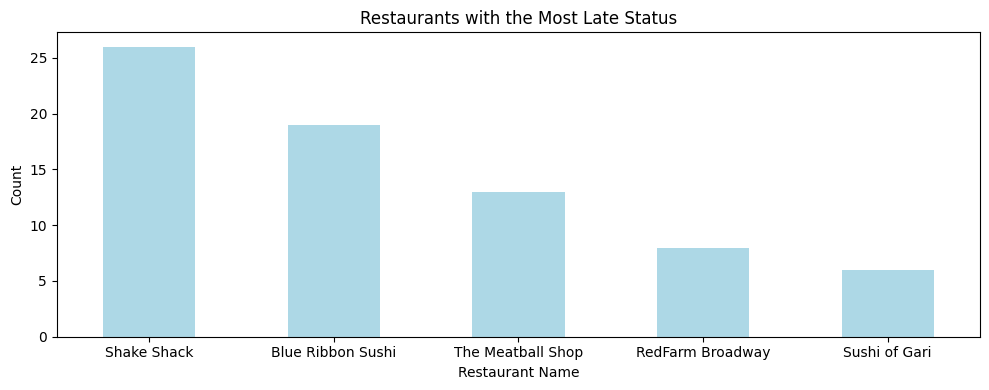

In [106]:
# To first filter the table for only orders on weekends
weekend_orders = df[df['status'] == 'Late']

# to find the popular cuisine on weekends
cuisines = weekend_orders['restaurant_name'].value_counts().nlargest(5)
print(cuisines)

# Plot the top 5 most used restaurants
plt.figure(figsize=(10, 4))
cuisines.plot(kind='bar', color='lightblue')

# Set the plot title and labels
plt.title('Restaurants with the Most Late Status')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation= 0)

# Show the plot
plt.tight_layout()
plt.show()

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusion

For my conclusion, I would like to point out some critical/important things I noticed from my analysis
- The presence of no rating. This accounted for over 700 rows of unrated orders out of 1898 orders
- There are restaurants that do not have ratings at all (22 restaurants)
- Although there are more orders on weekends than on weekdays, weekday deliveries take longer on average than weekend deliveries. This may be due to the weekday traffic conditions being worse than on the weekends, or it may be that most drivers work multiple jobs and are only available on the weekends, which results in a lack of drivers during the week. 
- Vietnamese and French cuisines are among the least frequently requested, yet when compared to other cuisines, their average delivery times are the longest. This can be because restaurants are paying more attention to the cuisine because there are more orders for them than for Vietnamese and French cuisine. 

### Recommendations

These recommendations are given to help improve the food aggregator company (FoodHub) business and also enhance the customer experience:

- Taking the upperhand with Technology: With the aid of technology, it is possible to track the whereabouts of drivers, customers, and restaurants, as well as to determine whether any of these parties are available for new deliveries. The technology can also be used to select the best driver based on proximity, optimize the driver's route, and ensure that deliveries are made as soon as possible.

- Prioritizing efficiency over speed: Ultimately, providing high-quality cuisine is best for enhancing the reputation of the restaurant and the restaurants. While maximizing delivery times is important, quality food should not be prioritized over speed in order to improve the client experience. 

- Customers should be giving ratings per order so that the business can tell if the customers are having an overall good experience or not. Also customers that gave a low rating (3 or below) should be prompted or send a follow-up mail to know the reason for the poor rating. This could help address the source of the customer complaints and help them have a good experience

- I would also recommend that the average food preparation time should be included on the app for each cuisine and for each restaurant so that the customers get to pick from the restaurant closer to them or pick from the restaurant that has less preparation time just incase the customer is in urgent need of that cuisine. This can help optimize time for food deliveries

- I would also advise that the customers on the applications be informed of the current traffic situation so that they may modify their expectations and understand what is causing the delays. Additionally, the app should be able to track the driver's movements so that users can see the path the driver is taking and the estimated travel time. In order to facilitate direct connection between the customer and the driver, the contact information for the driver could also be made available. Additionally, this will improve the client experience.